In [137]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as const
import scipy.integrate as spi
hbar=1
m=1
Eh =const.physical_constants["Hartree energy"][0]
a0 = const.physical_constants["Bohr radius"][0]
#energy=9
#k= np.sqrt(2*m*energy/hbar**2)

width in atomic units: 18.897261246257703


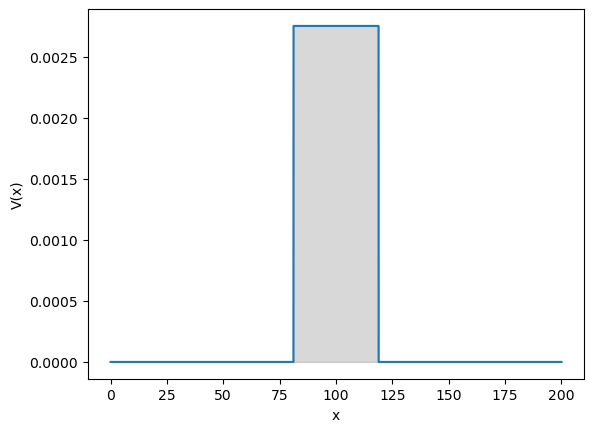

In [138]:
#QUES 1
V0 = (12e-21)/Eh
w=(1e-9)/a0
print("width in atomic units:",w)
a=0.01
xTotal=40
nPoints=int(xTotal/a)
x=np.linspace(0,200,nPoints+1)
V=np.full_like(x,0)
V[(x<=(100+w)) & (x >= (100-w))]=V0
plt.fill_between(x, V, interpolate=True, color='gray', alpha=0.3)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()


0.6818650721973037


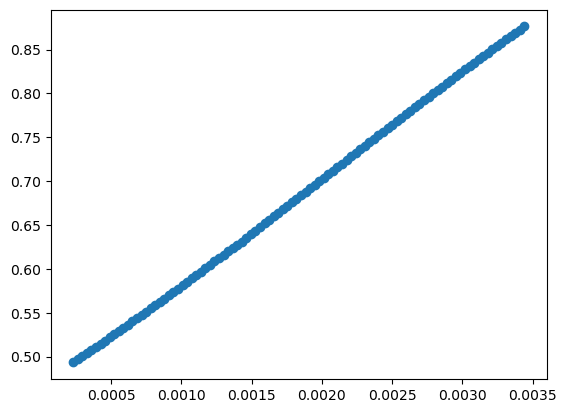

In [139]:
#Ques 1 contd.

def transmission(energy):
        k= np.sqrt(2*m*energy/hbar**2)
        Psi= np.full_like(x,0,dtype=complex)
        Psi[0]+=1
        Psi[1]+=np.exp(-1j*k*a)
        for j in range(2,nPoints+1):
            Psi[j]+=(2-(2*m/hbar**2)*(energy-V[j-1])*a*a)*Psi[j-1]-Psi[j-2]
        PsiSquared = (Psi*np.conjugate(Psi)).real
        PMin= np.min(PsiSquared[-300:])
        PMax= np.max(PsiSquared[-300:])
        return 2/(1+(PMin+PMax)/2)
print(transmission(8e-21/Eh))
E=np.linspace((1e-21)/Eh,(15e-21)/Eh,100)
TransProb=np.full_like(E,0)
for i in range(len(TransProb)):
    TransProb[i]=transmission(E[i])
plt.scatter(E,TransProb)
plt.show()



width in atomic units: 1 a.u


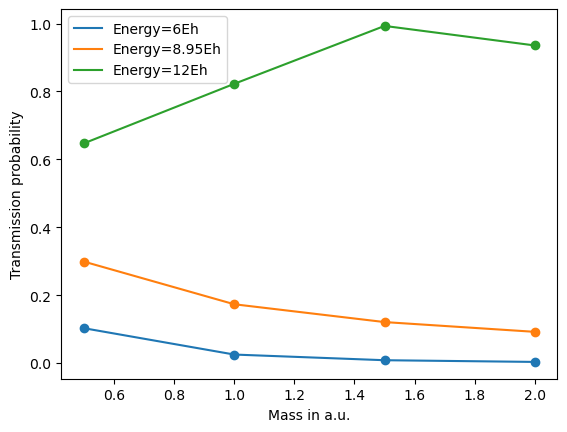

In [145]:
#QUES 2:
V0 = 9
w=1
print("width in atomic units:",1,"a.u")
a=0.01
xTotal=10
nPoints=int(xTotal/a)
x=np.linspace(0,10,nPoints+1)
V=np.full_like(x,0)
V[(x<=4) & (x >= 3)]=V0
for energy in [6,8.95,12]:
    def Transmission(m):
        k= np.sqrt(2*m*energy/hbar**2)
        Psi= np.full_like(x,0,dtype=complex)
        Psi[0]+=1
        Psi[1]+=np.exp(-1j*k*a)
        for j in range(2,nPoints+1):
            Psi[j]+=(2-(2*m/hbar**2)*(energy-V[j-1])*a*a)*Psi[j-1]-Psi[j-2]
        PsiSquared = (Psi*np.conjugate(Psi)).real
        PMin= np.min(PsiSquared[-300:])
        PMax= np.max(PsiSquared[-300:])
        return 2/(1+(PMin+PMax)/2)
    TransProb=[]
    mass= [0.5,1.0,1.5,2.0]
    for i in mass:
        TransProb.append(Transmission(i)) 
    plt.plot(mass, TransProb, label='Energy='+str(energy)+'Eh')
    plt.scatter(mass, TransProb)
    plt.legend()
    plt.xlabel("Mass in a.u.")
    plt.ylabel("Transmission probability")
plt.show()
    



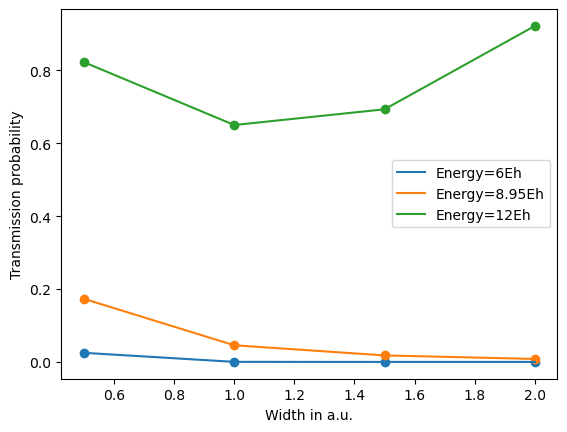

In [146]:
#Ques 3
V0 = 9
a=0.01
xTotal=10
nPoints=int(xTotal/a)
x=np.linspace(0,10,nPoints+1)

for energy in [6,8.95,12]:
    def Transmission(w):
        V=np.full_like(x,0)
        V[(x<=(5+w)) & (x >= (5-w))]=V0
        k= np.sqrt(2*m*energy/hbar**2)
        Psi= np.full_like(x,0,dtype=complex)
        Psi[0]+=1
        Psi[1]+=np.exp(-1j*k*a)
        for j in range(2,nPoints+1):
            Psi[j]+=(2-(2*m/hbar**2)*(energy-V[j-1])*a*a)*Psi[j-1]-Psi[j-2]
        PsiSquared = (Psi*np.conjugate(Psi)).real
        PMin= np.min(PsiSquared[-300:])
        PMax= np.max(PsiSquared[-300:])
        return 2/(1+(PMin+PMax)/2)
    TransProb=[]
    width=[0.5,1.0,1.5,2.0]
    for w in width:
        TransProb.append(Transmission(w)) 
    plt.plot(width, TransProb, label='Energy='+str(energy)+'Eh')
    plt.scatter(width, TransProb)
    plt.legend()
    plt.xlabel("Width in a.u.")
    plt.ylabel("Transmission probability")
plt.show()
    


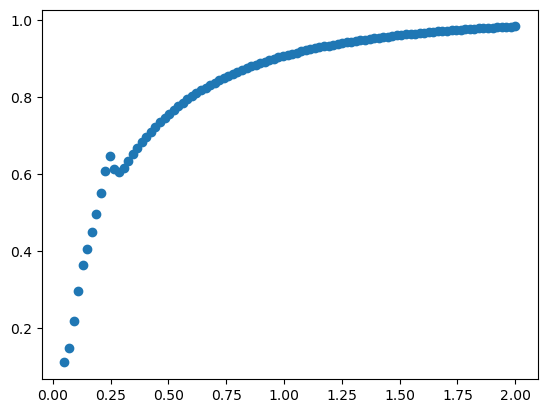

In [149]:
#Ques 4
V0 = -1
a=0.01
xTotal=10
nPoints=int(xTotal/a)
x=np.linspace(0,10,nPoints+1)
V=np.full_like(x,0)
V[(x<=4) & (x >= 3)]=V0
def transmission(energy):
        k= np.sqrt(2*m*energy/hbar**2)
        Psi= np.full_like(x,0,dtype=complex)
        Psi[0]+=1
        Psi[1]+=np.exp(-1j*k*a)
        for j in range(2,nPoints+1):
            Psi[j]+=(2-(2*m/hbar**2)*(energy-V[j-1])*a*a)*Psi[j-1]-Psi[j-2]
        PsiSquared = (Psi*np.conjugate(Psi)).real
        PMin= np.min(PsiSquared[-300:])
        PMax= np.max(PsiSquared[-300:])
        return 2/(1+(PMin+PMax)/2)
E=np.linspace(0.05,2,100)
TransProb=np.full_like(E,0)
for i in range(len(TransProb)):
    TransProb[i]=transmission(E[i])
plt.scatter(E,TransProb)
plt.show()


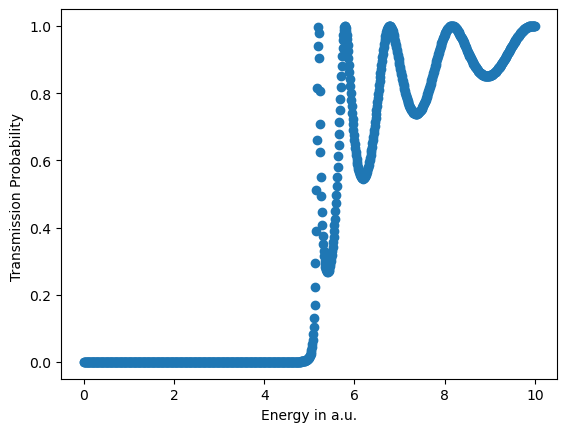

[8.80829693e-16 1.07033339e-15 1.30419917e-15 1.59316197e-15
 1.95030345e-15 2.37146872e-15 2.79665435e-15 3.22541604e-15
 3.66265260e-15 4.35515522e-15]
TRANSMISSION HAPPENING NEGLIGIBLY IN CASE OF INFINITE POTENTIAL BARRIER


In [247]:
#Ques 5
V0 = 5
a=0.01
xTotal=10
nPoints=int(xTotal/a)
x=np.linspace(0,10,nPoints+1)
V=np.full_like(x,0)
V[(x<=5)]=V0
def transmission(energy):
        k= np.sqrt(2*m*energy/hbar**2)
        Psi= np.full_like(x,0,dtype=complex)
        Psi[0]+=1
        Psi[1]+=np.exp(-1j*k*a)
        for j in range(2,nPoints+1):
            Psi[j]+=(2-(2*m/hbar**2)*(energy-V[j-1])*a*a)*Psi[j-1]-Psi[j-2]
        PsiSquared = (Psi*np.conjugate(Psi)).real
        PMin= np.min(PsiSquared[-300:])
        PMax= np.max(PsiSquared[-300:])
        #plt.plot(x,PsiSquared)
       # print(PsiSquared)
        return 2/(1+(PMin+PMax)/2)
E=np.linspace(0,10,1000)
TransProb=np.full_like(E,0)
for i in range(len(TransProb)):
    TransProb[i]=transmission(E[i])
#plt.plot(E,TransProb)
plt.scatter(E,TransProb)
plt.xlabel("Energy in a.u.")
plt.ylabel("Transmission Probability ")
plt.show()
print(TransProb[0:10])
print("TRANSMISSION HAPPENING NEGLIGIBLY IN CASE OF INFINITE POTENTIAL BARRIER")

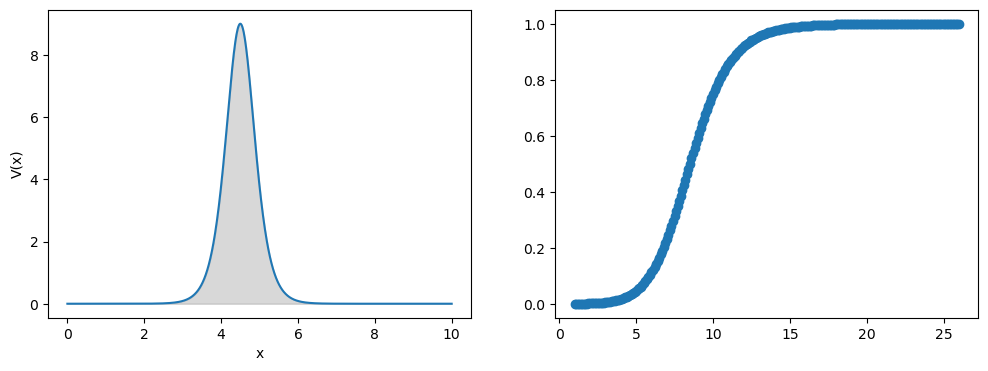

In [174]:
#QUES. 6: Eckart Barrier
V0=9
beta=4
X=4.5
V = 4*V0*np.exp(beta*(x-X))/(1+np.exp(beta*(x-X)))**2
fig,axs=plt.subplots(1,2,figsize=(12,4))
axs[0].fill_between(x, V, interpolate=True, color='gray', alpha=0.3)
axs[0].plot(x,V)
axs[0].set_xlabel('x')
axs[0].set_ylabel('V(x)')
def transmission(energy):
    k= np.sqrt(2*m*energy/hbar**2)
    Psi= np.full_like(x,0,dtype=complex)
    Psi[0]+=1
    Psi[1]+=np.exp(-1j*k*a)
    for j in range(2,nPoints+1):
        Psi[j]+=(2-(2*m/hbar**2)*(energy-V[j-1])*a*a)*Psi[j-1]-Psi[j-2]
    PsiSquared = (Psi*np.conjugate(Psi)).real
    PMin= np.min(PsiSquared[-300:])
    PMax= np.max(PsiSquared[-300:])
    return 2/(1+(PMin+PMax)/2)
E=np.linspace(1,26,251)
TransProb=np.full_like(E,0)
for i in range(len(TransProb)):
    TransProb[i]=transmission(E[i])
axs[1].scatter(E,TransProb)
plt.show()
print("Results with the Guassian barrier almost same as Eckart barrier")

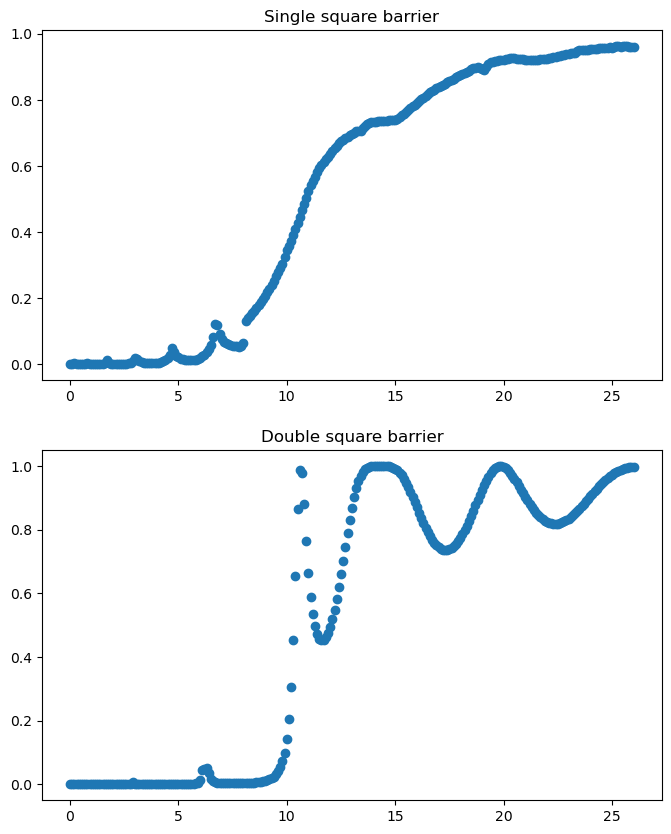

In [195]:
#Ques 7: Resonant Tunneling
fig,axs=plt.subplots(2,1,figsize=(8,10))

E=np.linspace(0,26,261)
TransProb=np.full_like(E,0)
for i in range(len(TransProb)):
    if E[i]<=8:
        a=0.1
    else:
        a=0.01
    V0 = 9
    xTotal=10
    nPoints=int(xTotal/a)
    x=np.linspace(0,10,nPoints+1)
    V=np.full_like(x,0)
    V[((x<3) & (x>2))|((x<6) & (x>5))]=V0
    def transmission(energy):
            k= np.sqrt(2*m*energy/hbar**2)
            Psi= np.full_like(x,0,dtype=complex)
            Psi[0]+=1
            Psi[1]+=np.exp(-1j*k*a)
            for j in range(2,nPoints+1):
                Psi[j]+=(2-(2*m/hbar**2)*(energy-V[j-1])*a*a)*Psi[j-1]-Psi[j-2]
            PsiSquared = (Psi*np.conjugate(Psi)).real
            PMin= np.min(PsiSquared[-300:])
            PMax= np.max(PsiSquared[-300:])
            return 2/(1+(PMin+PMax)/2)
    TransProb[i]=transmission(E[i])
axs[1].scatter(E,TransProb)


E=np.linspace(0,26,261)
TransProb=np.full_like(E,0)
for i in range(len(TransProb)):
    if E[i]<=8:
        a=0.001
    else:
        a=0.1
    V0 = 9
    xTotal=10
    nPoints=int(xTotal/a)
    x=np.linspace(0,10,nPoints+1)
    V=np.full_like(x,0)
    V[((x<5) & (x>4))]=V0
    def transmission(energy):
            k= np.sqrt(2*m*energy/hbar**2)
            Psi= np.full_like(x,0,dtype=complex)
            Psi[0]+=1
            Psi[1]+=np.exp(-1j*k*a)
            for j in range(2,nPoints+1):
                Psi[j]+=(2-(2*m/hbar**2)*(energy-V[j-1])*a*a)*Psi[j-1]-Psi[j-2]
            PsiSquared = (Psi*np.conjugate(Psi)).real
            PMin= np.min(PsiSquared[-300:])
            PMax= np.max(PsiSquared[-300:])
            return 2/(1+(PMin+PMax)/2)
    TransProb[i]=transmission(E[i])
axs[0].scatter(E,TransProb)
axs[0].set_title('Single square barrier')
axs[1].set_title('Double square barrier')
plt.show()

In [227]:
#Ques 8
A1=9
X=4.5
c1=0.6
B=4
x,A2,c2 = sp.symbols('x A2 c2',real=True)
V1=A1*sp.exp(-((x-X)/c1)**2)
V2=A2*sp.exp(-((x-X)/c2)**2)+B


equation1 = sp.Eq(V1.subs({x:X}), V2.subs({x:X}))
solution1 = sp.solve(equation1, A2)
A2 = solution1[0]
V2=A2*sp.exp(-((x-X)/c2)**2)+B
equation2 = sp.Eq(sp.diff(sp.diff(V1,x),x).subs({x:X}), sp.diff(sp.diff(V2,x),x).subs({x:X}))
solution2 = sp.solve(equation2, c2)
# Print the solutions
print("A2=",solution1[0])
print("solutions of c2=",solution2)
c2= solution2[1]
print("Let's take c2 as",c2)


A2= 5
solutions of c2= [-0.447213595499958, 0.447213595499958]
Let's take c2 as 0.447213595499958


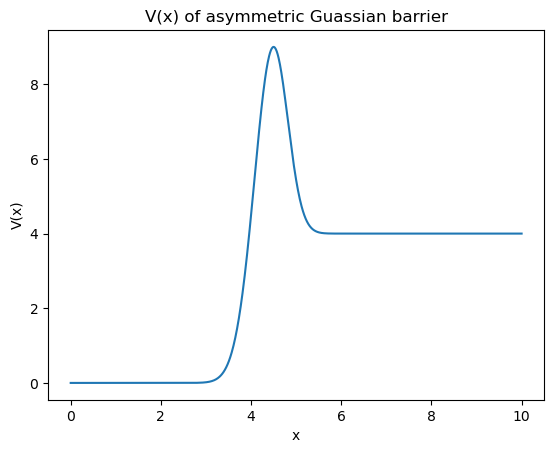

In [245]:
#Ques 8 contd. 
x = sp.symbols('x')
V1=A1*sp.exp(-((x-X)/c1)**2)
V2=A2*sp.exp(-((x-X)/c2)**2)+B
V1 = sp.lambdify(x,V1,"numpy")
V2 = sp.lambdify(x,V2, "numpy")
a=0.01
xTotal=10
nPoints=int(xTotal/a)
x=np.linspace(0,10,nPoints+1)
V=np.full_like(x,0)
V[x<=X]=V1(x[x<=X])
V[x>X]=V2(x[x>X])
plt.plot(x,V)
plt.title("V(x) of asymmetric Guassian barrier")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.show()